<a href="https://colab.research.google.com/github/EDC21/Deep-Learning/blob/master/%E6%AD%A1%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building a Image Classifier 
In this example, we will tackle the dataset,Fashion MNIST.



## Loda the dataset

When loading Fashion MNIST using Keras rather than Sklearn, one important difference is that every image is represented as a 28x28 array rather than a 1D array of size 784.  
Moreoverm the pixel intensities are represented as integers (from 0 to 255) rather than floats (from 0.0 to 255.0)

In [32]:
import tensorflow as tf
from tensorflow import keras
import sklearn
import numpy as np
import os
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layeout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
#Load the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let's look at the shape and data type of the training set

The training set contains 60,000 grayscale images, each 28x28 pixels.


In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel inetnsity is represented as a byte

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a training set.  
As we are going to train the neural network using Gradient Descent, we must scale the input features. For simplicity, we'll scale the pixel intensities down to the 0-1 range by dividing them by 255.0 

In [10]:
X_vaild, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_vaild, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


plot an image

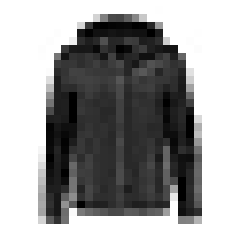

In [15]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs(represented as unit 8), from 0 to 9:

In [16]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponsing class names:

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


So the first image in the training set is a coat:

In [20]:
class_names[y_train[0]]

'Coat'

The validation set contains 5000 images, and the test set contains 10,000 images:


In [21]:
X_vaild.shape

(5000, 28, 28)

In [22]:
X_test.shape

(10000, 28, 28)

## Creating the model using the Sequential API

In [25]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Instead of adding the layers one by one, we can pass a list of layers when creating the Sequential model:

In [30]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[28,28]),
  keras.layers.Dense(300,activation="relu"),
  keras.layers.Dense(100,activation="relu"),
  keras.layers.Dense(10,activation="softmax")                              
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


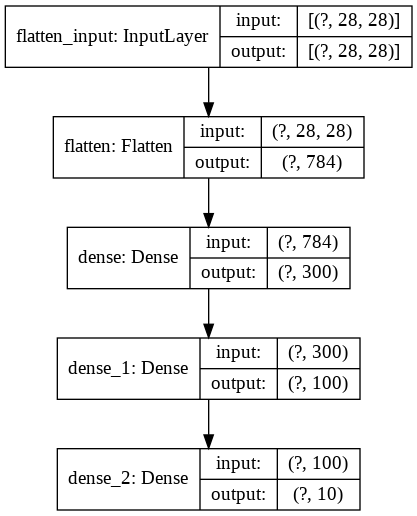

In [34]:
keras.utils.plot_model(model, "my_fashion_mnist_mode.png", show_shapes=True)

All the parameters of a layer can be accessed using its get_weights() and set_weights() methods.

In [35]:
hidden1 = model.layers[1]
model.get_layer(hidden1.name) is hidden1
weights, biases = hidden1.get_weights()

In [36]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

Note that the Dense layer initialized the connection weights randomly to break the symmetry.

In [37]:
weights.shape

(784, 300)

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
biases.shape

(300,)

## Compliling the model

After a model is created, we must call its complie() method to specify the loss function and the optimizer to use.

In [41]:
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer="sgd", 
              metrics=["accuracy"])

Explanation: 1.we use the "sparse_categorical_crossentropy" loss because we have sparse labels(i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance(such as one-hot vectors, e.g.[0., 0., 1., 0.]) then we could need to use "categorical_crossentropy" loss instead.

when using the SGD optimizer, it is important to tune the learning rate. So we generally want to use optimizer=keras.optimizers.SGD(lr=???) to the the learning rate, rather than optimizer="sgd", which defalutes to lr=0.01.

## Training and evaluating the model

In [42]:
history = model.fit(X_train, y_train, epochs=30,
                validation_data=(X_vaild, y_vaild))


Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7237 - accuracy: 0.7643 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4842 - accuracy: 0.8318 - val_loss: 0.4353 - val_accuracy: 0.8526
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4391 - accuracy: 0.8458 - val_loss: 0.5304 - val_accuracy: 0.7996
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4123 - accuracy: 0.8566 - val_loss: 0.3916 - val_accuracy: 0.8650
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3939 - accuracy: 0.8622 - val_loss: 0.3745 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3752 - accuracy: 0.8675 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3631 - accuracy: 0.8716 - val_loss: 0.3616 - val_accuracy:

In [43]:
history.params #the training parameters

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [45]:
history.history #A dictionary containg the loss and extra metrics at the end of each epoch

{'accuracy': [0.7643091082572937,
  0.831781804561615,
  0.8457818031311035,
  0.8565636277198792,
  0.8622363805770874,
  0.8675454258918762,
  0.8715817928314209,
  0.8747454285621643,
  0.8793454766273499,
  0.8820545673370361,
  0.8839091062545776,
  0.8865454792976379,
  0.8896363377571106,
  0.8916545510292053,
  0.8939999938011169,
  0.8971454501152039,
  0.8979091048240662,
  0.9006181955337524,
  0.902363657951355,
  0.9035817980766296,
  0.9055818319320679,
  0.9071454405784607,
  0.9085999727249146,
  0.9103817939758301,
  0.9126545190811157,
  0.9137818217277527,
  0.9155091047286987,
  0.9166181683540344,
  0.9180545210838318,
  0.9203454256057739],
 'loss': [0.7237027883529663,
  0.484192818403244,
  0.4390644133090973,
  0.41230905055999756,
  0.39393678307533264,
  0.37517988681793213,
  0.3631107211112976,
  0.3514234721660614,
  0.34116992354393005,
  0.3316737115383148,
  0.32377755641937256,
  0.31472039222717285,
  0.3077256381511688,
  0.30191129446029663,
  0.294

use the "history.history" dictionary to create a pandas DataFrame and call its plot(), we can get the learning curves.

NameError: ignored

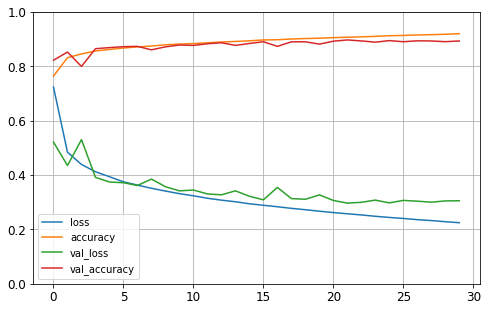

In [47]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [49]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.9763 - accuracy: 0.1000


[2.9763262271881104, 0.10000000149011612]

##Using the model to make predicts

In [50]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[0.1 , 0.01, 0.08, 0.11, 0.01, 0.4 , 0.09, 0.18, 0.02, 0.01],
       [0.11, 0.01, 0.09, 0.11, 0.01, 0.38, 0.1 , 0.18, 0.02, 0.01],
       [0.11, 0.01, 0.08, 0.12, 0.01, 0.37, 0.09, 0.18, 0.02, 0.01]],
      dtype=float32)

For the first image it esitimates that the probability of class 9 is 96%.